# CC3001 Otoño 2023 Tarea 1 - Luciano Márquez

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
##librerias usadas para parte 1
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def arena(N):
  t = int((2* (np.sqrt(N/np.pi))))  #valor de prueba para tamaño del tablero

  if t%2 == 0:
    t += 1 #asegurar que exista un centro en caso de t par

  tablero = np.zeros((t,t) , dtype= int)
  centro = t//2 #numero para indexar
  veces = 0
  tablero[centro,centro] = N

  condicion = True
  while condicion == True: #mientras haya valores mayores igual a 4
    if True in (tablero >= 4): #si existen valores mayores o iguales a 4 en el tablero
      for fila in range(0,t):
        for columna in range(0,t): #recorrer todas las casillas
          if tablero[fila,columna] >= 4: #si la actual casilla tiene valor mayor o igual a cuatro se aplica la condición
            tablero[fila,columna] -= 4

            tablero[fila+1,columna] += 1
            tablero[fila-1,columna] += 1
            tablero[fila,columna+1] += 1
            tablero[fila,columna-1] += 1

            veces += 1 #mas uno en el contador de veces que se ha aplicado la regla
    else:
      condicion = False #si no hay valores mayores o iguales a cuatro, actualizar la condición del while

  plt.matshow(tablero)
  graf = plt.show() #graficar el tablero

  print( "La arena se distribuyó " + str(veces) + " veces.") #imprimir el numero de veces que se aplicó la regla

Explique aquí cómo calculó el tamaño que necesita tener el tablero:

- Analizando la manera en la que se comporta el fenómeno físico y como este fue modelado, podemos pensar que después de un determinado tiempo, cuando ya haya caido toda la arena y esta esté distribuida siguiendo las reglas ya establecidas para el problema, si miramos el resultado desde arriba podemos ver que la figura resultante es lo suficientemente parecida a la de un círculo para poder considerarla como tal y poder aprovecharnos de sus propiedades, para este caso es útil la fórmula para el área de un círculo ($Área = radio^{2} \cdot \pi$), pues si hacemos la aproximación de que la arena ya se distribuyó por completo podemos establecer que el área de este círculo es igual a $N$, de esta manera se puede despejar el valor del radio del ciculo aproximado de la siguiente forma:
$$ N = radio^{2} \cdot \pi \\
\implies \frac{N}{\pi} = radio^{2} \\
\implies \sqrt{\frac{N}{\pi}} = \sqrt{radio^{2}} \\
\implies \sqrt{\frac{N}{\pi}} = radio
$$

Sabiendo ya el valor del radio de un circulo aproximadamente, podemos conocer el largo necesario para cada lado del tablero para que este pueda contener el círculo resultante:

$$ LadoDelTablero = diámetro = 2 \cdot radio = 2 * \sqrt{\frac{N}{\pi}} $$

Ahora ejecute la función para $N=128$:

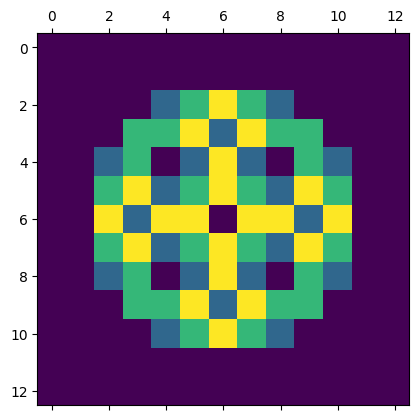

La arena se distribuyó 342 veces.


In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

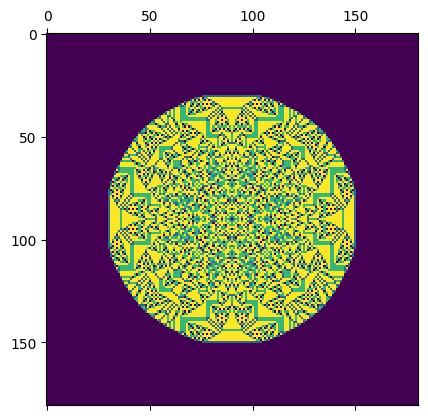

La arena se distribuyó 12265396 veces.


In [ ]:
arena(26000)

Dentro de los valores probados, considero que el valor de $N = 26000$ ya que se tardó un tiempo que considero razonable, alrededor de 4 minutos.

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
##librerias usadas para parte 2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def arena2(N):
  t = int((2* (np.sqrt(N/np.pi))))  #valor de prueba para tamaño del tablero

  if t%2 == 0:
    t += 1 #asegurar que exista un centro en caso de t par

  tablero = np.zeros((t,t) , dtype= int)
  centro = t//2 #numero para indexar
  veces = 0
  tablero[centro,centro] = N

  condicion = True
  while condicion == True: #mientras haya valores mayores igual a 4
    if True in (tablero >= 4): #si existen valores mayores o iguales a 4 en el tablero
      for fila in range(0,t):
        for columna in range(0,t): #recorrer todas las casillas
          if tablero[fila,columna] >= 4: #si la actual casilla tiene valor mayor o igual a cuatro se aplica la condición
            multiplo = tablero[fila,columna] // 4 #se calcula el mayor multiplo de 4 que se puede restar a la casilla
            tablero[fila,columna] -= multiplo*4

            tablero[fila+1,columna] += multiplo
            tablero[fila-1,columna] += multiplo
            tablero[fila,columna+1] += multiplo
            tablero[fila,columna-1] += multiplo

            veces += 1 #mas uno en el contador de veces que se ha aplicado la regla
    else:
      condicion = False #si no hay valores mayores o iguales a cuatro, actualizar la condición del while

  plt.matshow(tablero)
  graf = plt.show() #graficar el tablero

  print( "La arena se distribuyó " + str(veces) + " veces.") #imprimir el numero de veces que se aplicó la regla



Ahora ejecute la función para $N=128$:

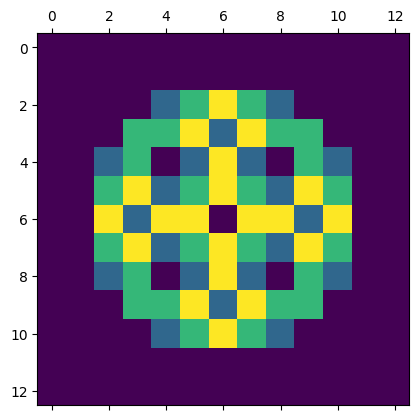

La arena se distribuyó 227 veces.


In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

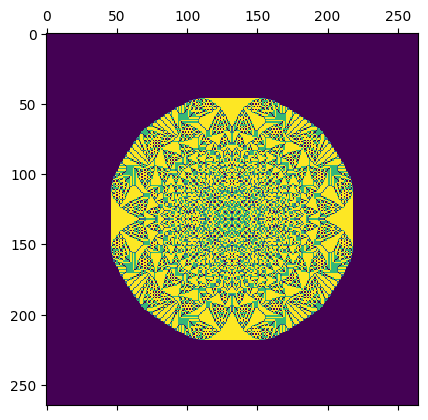

La arena se distribuyó 35280239 veces.


In [ ]:
arena2(55000)

Notar que para la función ya optimizada el valor grande para obtener un resultado en un tiempo razonable es mayor al doble que del valor usado para la función anterior ($N = 55000$), y aún así, para esta nueva función optimizada el tiempo es de 3 minutos, que es menor a los 4 minutos de la anterior función.

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

### Tabla y gráfico




A continuación se muestra una tabla con los valores probados de N para cada función y un gráfico de los datos obtenidos:


|N   | Aplicaciones (arena)| Aplicaciones (arena2)|
|---|---|---|
|4 |1 |1 |
|16 | 9 | 6 |
|64 | 88 | 49 |
|128 | 342 | 227|
|512 | 5.175 | 3.401 |
|1.024 | 20.384 | 13.579|
|2.048 | 78.465 | 51.553|
|4.096 | 312.768 | 205.805|
|8.192 | 1.216.549 | 791.382|

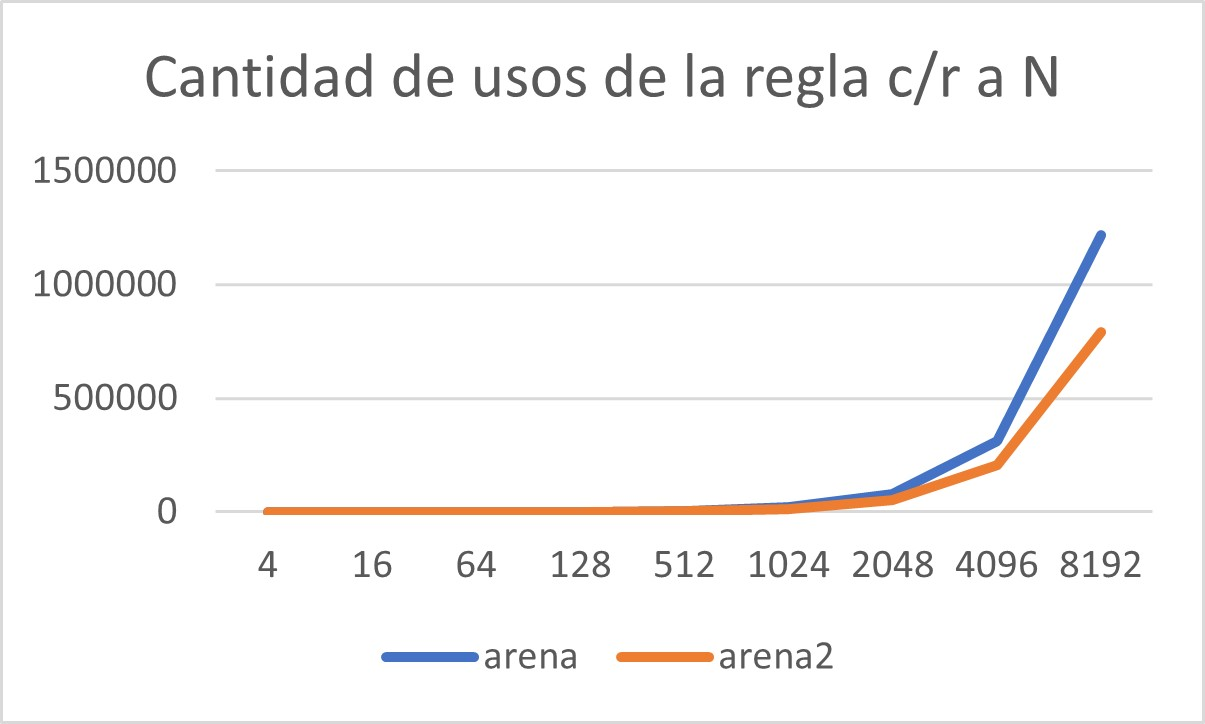

###Discusión



De estos datos, se puede ver claramente que entre la primera función y la segunda, existe una diferencia en el número de veces que se aplica la regla del fenómeno analizado, dicha diferencia se refleja claramente en el gráfico anterior, donde también se puede ver que a medida que el número es más alto la optimización hecha a la función $arena2$ es más efectiva, es decir, mientras más grande es el número $N$, mayor es el "ahorro" de aplicaciones de la regla en la función optimizada. Es por esto que se puede decir que la optimización hecha fue valió totalmente la pena, pues las mejoras hechas se reflejan también en el tiempo que tarda la función en correr.

Con respecto a otras optimizaciónes posibles para el algoritmo de $arena2$, algo que podría hacerse, así como se hace en la segunda parte, es considerar nuevamente la multiplicidad del valor $N$ con respecto a $4$, y usar esto de la misma forma, pero ir un paso más allá y programar el algorítmo de forma que este no sólo compruebe la cantidad de veces que se puede aplicar la regla en la actual casilla del ciclo, sino que también dependiendo de cuantos múltiplos de cuatro traspase a la siguiente casilla, el cálculo de la regla que vaya a aplicar en dicha siguiente casilla se pueda hacer al momento, lo cual se podría llegar a hacer de alguna manera con una función que haga lo dicho y que se pueda utilizar de forma recursiva, de esta forma el algorítmo no requeriría volver a dar un ciclo para encontrar y actuar en esta casilla, lo que resultaría en menos ciclos totales dentro de la función y en consecuencía una mejoría en tiempo.